# All library

In [5]:
### All library
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
from texttable import Texttable as tt
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from scipy.stats import moment
import math as math
import ete3
from ete3 import Tree,faces,TreeStyle,TextFace

# Read file

In [8]:
# Read file from Excel
data = pd.ExcelFile('Stat_2019_1_mid.xlsx') ### file name
data_each_page = pd.read_excel(data, 'Pelican')
print(data_each_page)
print(data_each_page['Age'])
### or directly read excel
data_directly_excel = pd.read_excel('Stat_2019_1_mid.xlsx')

    Customer  Type_of_Customer  Items  Net_Sales  Method_of_Payment  Age
0          1                 1      1      39.50                  3   32
1          2                 0      1     102.40                  1   36
2          3                 1      1      22.50                  1   32
3          4                 0      5     100.40                  1   28
4          5                 1      2      54.00                  2   34
..       ...               ...    ...        ...                ...  ...
95        96                 1      1      39.50                  2   44
96        97                 0      9     253.00                  1   30
97        98                 0     10     287.59                  1   52
98        99                 0      2      47.60                  1   30
99       100                 0      1      28.44                  1   44

[100 rows x 6 columns]
0     32
1     36
2     32
3     28
4     34
      ..
95    44
96    30
97    52
98    30
99    44
N

# Write an excel file

In [36]:
import xlwt 
from xlwt import Workbook 
  
# Workbook is created 
wb = Workbook() 
  
# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Sheet 1') 
  
sheet1.write(1, 0, 'ISBT DEHRADUN') 
sheet1.write(2, 0, 'SHASTRADHARA') 
sheet1.write(3, 0, 'CLEMEN TOWN') 
sheet1.write(4, 0, 'RAJPUR ROAD') 
sheet1.write(5, 0, 'CLOCK TOWER') 
sheet1.write(0, 1, 'ISBT DEHRADUN') 
sheet1.write(0, 2, 'SHASTRADHARA') 
sheet1.write(0, 3, 'CLEMEN TOWN') 
sheet1.write(0, 4, 'RAJPUR ROAD') 
sheet1.write(0, 5, 'CLOCK TOWER') 
  
wb.save('xlwt example.xls') 

# Graph representation

- Bar chart

In [6]:
### bar chart
plt.rcParams["figure.dpi"] = 120
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 1), # 1 points vertical offset
                textcoords="offset points",
                size=6, # fontsize=7
                ha='center',va='bottom')

df = pd.read_excel('Xr02-13.xlsx')
print(df)

                 Country  Oil Reserves (Barrels)
0                 Brazil             15310000000
1                 Canada            172500000000
2                  China             24650000000
3                   Iran            157800000000
4                   Iraq            144200000000
5             Kazakhstan             30000000000
6                 Kuwait            104000000000
7                  Libya             48360000000
8                Nigeria             37070000000
9                  Qatar             25240000000
10                Russia            103200000000
11          Saudi Arabia            268300000000
12  United Arab Emirates             97800000000
13         United States             36520000000
14             Venezuela            298400000000


In [9]:
### sort data in the file with the ascending order
df = df.sort_values(by=['Oil Reserves (Barrels)'],ascending=False)
labels = df['Country']
sizes = []
for num in df['Oil Reserves (Barrels)']:
    sizes.append(int(num/10000000))

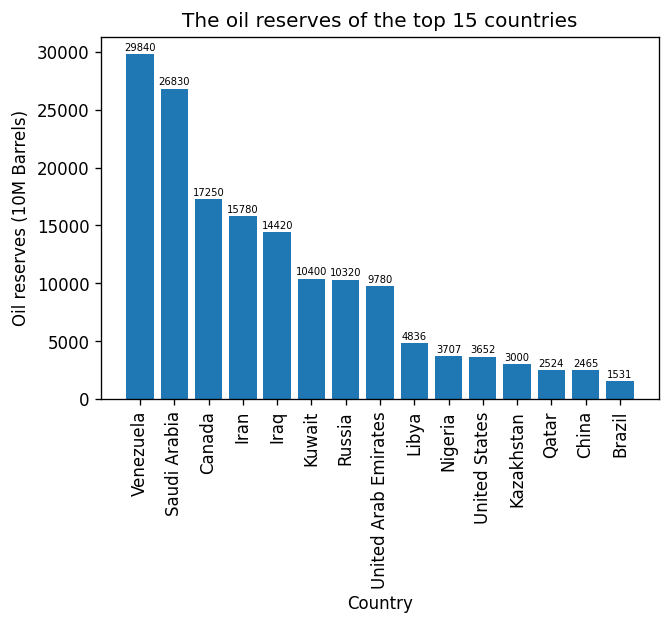

In [10]:
fig, ax = plt.subplots()
rects = ax.bar(labels, sizes, width=0.8, bottom=None, align='center') 
plt.title('The oil reserves of the top 15 countries') #記得改標題 
plt.ylabel('Oil reserves (10M Barrels)') # Y軸 label 配合單位 
plt.xlabel('Country')
plt.xticks(labels,rotation='vertical') # X軸 laebl 顯示角度調整，避免字被擋到
autolabel(rects) 
plt.show()

- Pie chart

             Newspaper  Frequency  Relative Frequency
1  New York Daily News        141            0.391667
2        New York Post        128            0.355556
4  Wall Street Journal         59            0.163889
3       New York Times         32            0.088889


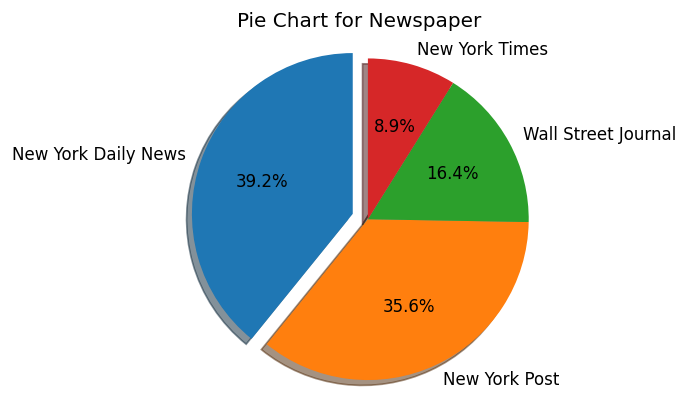

In [13]:
### Pie chart
df = pd.read_excel('Xr02-29.xlsx') #看看資料
#frequency
Ncount_tab = df['Newspaper'].value_counts()
#Relative frequency
Npropotion_tab = Ncount_tab/len(df['Newspaper'])
#A dataframe for Newspaper Name, Frequency, Relative Frequency
#注意 3. New Tork Times 和 4. Wall Street Journal的排序，因次數的結果顯示1>2>4>3，為了對應名稱方便，NName的順序也是1,2,4,3
NName = ("New York Daily News", "New York Post", "Wall Street Journal","New York Times")
fre_tab={"Newspaper": NName, "Frequency":Ncount_tab, "Relative Frequency": Npropotion_tab}
print(pd.DataFrame(fre_tab))

explode=(0.1, 0, 0, 0) ## split
fig, ax = plt.subplots()
ax.pie(Ncount_tab,explode=explode, labels=NName, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Newspaper')
plt.show()

- Group bar chart

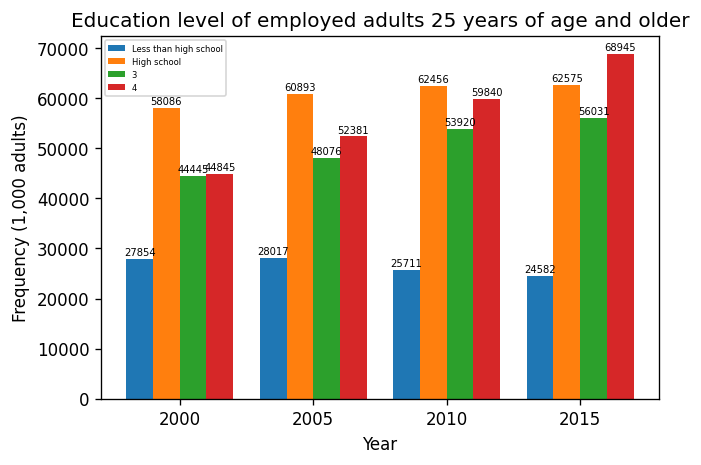

In [17]:
df = pd.read_excel('Xr02-41.xlsx')
Y_label = list(df.columns)[1:]

x = np.arange(len(Y_label)) # the label locations 
width = 0.2 # the width of the bars 
fig, ax = plt.subplots()

#根據資料調整rects數，X軸上位置，以及label
rects1 = ax.bar(x - 3*width/2, df.iloc[0][Y_label], width, label = "Less than high school")
rects2 = ax.bar(x - width/2, df.iloc[1][Y_label], width, label = "High school")
rects3 = ax.bar(x + width/2, df.iloc[2][Y_label], width, label = "3")
rects4 = ax.bar(x + 3*width/2, df.iloc[3][Y_label], width, label = "4")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency (1,000 adults)')
ax.set_xlabel('Year')
ax.set_title('Education level of employed adults 25 years of age and older')
ax.set_xticks(x)
ax.set_xticklabels(Y_label)
ax.legend(fontsize=5) ## be able to adjust size
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
plt.show()

Share             1   2    3   4
Political View                  
1               122  81  187  18
2                70  39  236   7
3                34  41  259   7


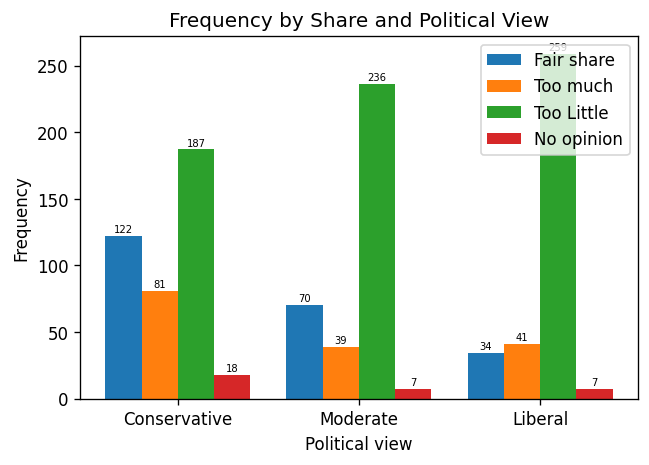

In [19]:
df = pd.read_excel('Xr02-35.xlsx')
#crosstab:分群在前，選項在後
contb = pd.crosstab( df["Political View"],df["Share"])
print(contb)
P_label = ("Conservative", "Moderate", "Liberal")

x = np.arange(len(P_label)) # the label locations 
width = 0.2 # the width of the bars 
fig, ax = plt.subplots()
#根據資料調整rects數，X軸上位置，以及label
rects1 = ax.bar(x - 3*width/2, contb[1], width, label = "Fair share")
rects2 = ax.bar(x - 1*width/2, contb[2], width, label = "Too much") 
rects3 = ax.bar(x + 1*width/2, contb[3], width, label = "Too Little") 
rects4 = ax.bar(x + 3*width/2, contb[4], width, label = "No opinion")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xlabel('Political view')
ax.set_title('Frequency by Share and Political View')
ax.set_xticks(x)
ax.set_xticklabels(P_label)
ax.legend()
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
plt.show()

- Histogram

Head of dataset:


,Calls
0,10
1,8
2,9
3,7
4,10


Tail of dataset:


,Calls
23,7
24,11
25,4
26,9
27,5


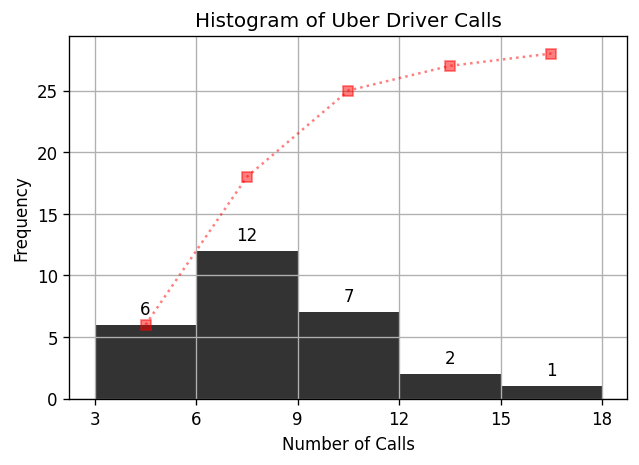

In [21]:
# 設定圖形大小; DPI越大圖越大 
plt.rcParams["figure.dpi"] = 120
#Read the data
df_xr0305 = pd.read_excel('Xr03-05.xlsx') 
print('Head of dataset:')
display(df_xr0305.head()) 
print("Tail of dataset:")
display(df_xr0305.tail())

# the histogram of the data
bins_list = [3,6,9,12,15,18] 
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(df_xr0305["Calls"], bins=bins_list, density=False, facecolor='k', alpha=0.8) 

mu=np.mean(df_xr0305["Calls"])
sigma=np.std(df_xr0305["Calls"])

plt.xlabel('Number of Calls') 
plt.ylabel('Frequency') 
plt.title('Histogram of Uber Driver Calls')

plt.grid(True) 
plt.xticks(bins_list)

bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])] 
ax.plot(bin_centers, counts.cumsum(),'rs:',alpha=0.5)

def autolabel(patches):
#attach a text label above each bar in *rects*, displaying its height. 
    for rect in patches:
        height=(int)(rect.get_height()) 
        width=rect.get_width() 
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x()+width/2,height), xytext=(0, 4),
                     textcoords="offset points", ha='center', va='bottom')

autolabel(patches)
plt.show()

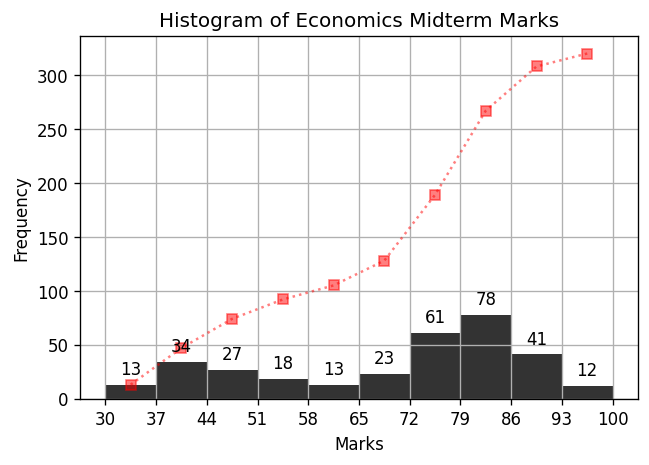

In [24]:
df_xr0317 = pd.read_excel('Xr03-17.xlsx')

bins_list = [30,37,44,51,58,65,72,79,86,93,100]

fig, ax = plt.subplots()
counts, bins, patches = plt.hist(df_xr0317["Marks"], bins=bins_list, density=False, facecolor='k', alpha=0.8)

mu=np.mean(df_xr0317["Marks"])
sigma=np.std(df_xr0317["Marks"])

plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Histogram of Economics Midterm Marks')

plt.grid(True)
plt.xticks(bins_list)

bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])] 
ax.plot(bin_centers, counts.cumsum(),'rs:',alpha=0.5) ## this is used to display the red ogive line

def autolabel(patches):
#attach a text label above each bar in *rects*, displaying its height. 
    for rect in patches:
        height=(int)(rect.get_height()) 
        width=rect.get_width() 
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x()+width/2,height), xytext=(0, 4),
                     textcoords="offset points", ha='center', va='bottom')

autolabel(patches)
plt.show()

- Line chart

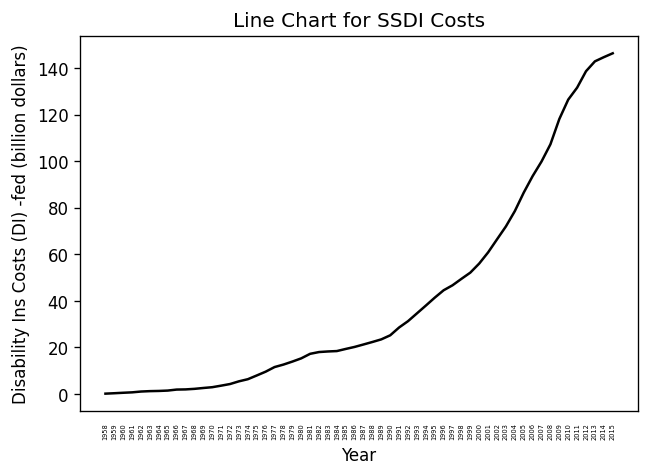

In [26]:
df_xr0339 = pd.read_excel('Xr03-39.xlsx')

n = df_xr0339["Year"].size
year = np.array(df_xr0339["Year"])

plt.plot(df_xr0339["Year"], df_xr0339["Disability Ins (DI) -fed"],color="black") 
plt.xticks(df_xr0339["Year"], rotation='vertical', fontsize=4)

plt.tick_params(
    axis='x', # changes apply to the x-axis
    which='both', # both major and minor ticks are affected
    bottom=False, # ticks along the bottom edge are off
    top=False) # ticks along the top edge are off

plt.subplots_adjust(bottom=0.1)
plt.xlabel('Year')
plt.ylabel('Disability Ins Costs (DI) -fed (billion dollars)') 
plt.title('Line Chart for SSDI Costs')
plt.show()

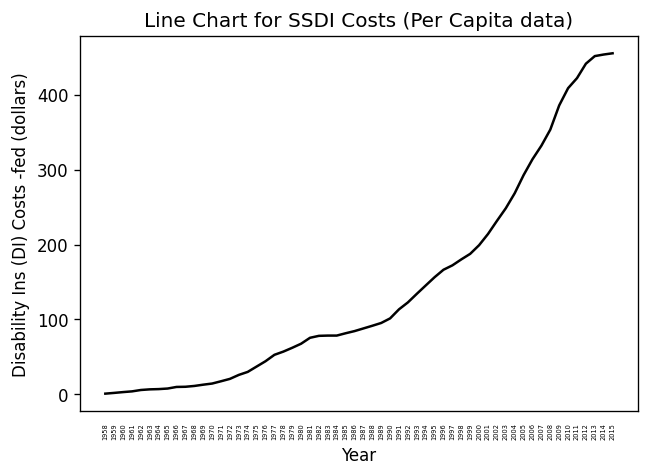

In [27]:
population = pd.read_excel('U.S. Population 1935-2015.xlsx') 
population_1958=population.tail(58).reset_index() # get the tail of data
#population_1958

per_capita=df_xr0339["Disability Ins (DI) -fed"]*1000/population_1958['U.S. Population (millions)'] 
plt.plot(df_xr0339["Year"], per_capita,color="black")
plt.xticks(df_xr0339["Year"], rotation='vertical', fontsize=4)

plt.tick_params( axis='x',
which='both', bottom=False, top=False)

plt.subplots_adjust(bottom=0.1)
plt.xlabel('Year')
plt.ylabel('Disability Ins (DI) Costs -fed (dollars)') 
plt.title('Line Chart for SSDI Costs (Per Capita data)') 
plt.show()

- Two lines line chart

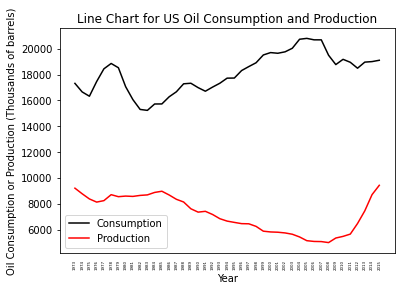

RangeIndex(start=0, stop=43, step=1)


In [18]:
#讀取資料集
df_xr0347 = pd.read_excel('Xr03-47.xlsx')

n = df_xr0347["Year"].size
year = np.array(df_xr0347["Year"])
plt.plot(df_xr0347["Year"], df_xr0347["Consumption"],label="Consumption",color="black") 
plt.plot(df_xr0347["Year"], df_xr0347["Production"],label="Production",color="red") 
plt.xticks(df_xr0347["Year"], rotation='vertical', fontsize=4)

plt.tick_params( axis='x',
which='both', bottom=False, top=False)

plt.subplots_adjust(bottom=0.1)
plt.xlabel('Year')
plt.ylabel('Oil Consumption or Production (Thousands of barrels)') 
plt.title('Line Chart for US Oil Consumption and Production') 
plt.legend()
plt.show()

print(df_xr0347.index) ## we can replace the df_xr0347["Year"] with df.index

- Scatter plot

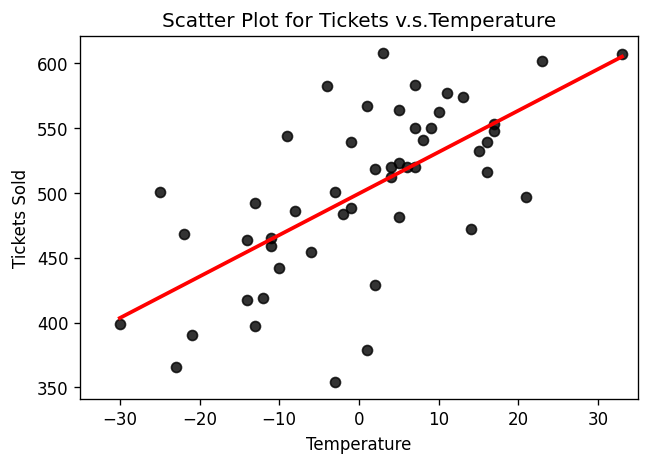

In [32]:
df_xr0353 = pd.read_excel('Xr03-63.xlsx')

_ = sns.regplot(x='Temperature', y= 'Tickets', data = df_xr0353, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ci = None)
plt.title('Scatter Plot for Tickets v.s.Temperature')
plt.xlabel('Temperature')
plt.ylabel('Tickets Sold')
plt.xlim(-35,35)
plt.show()

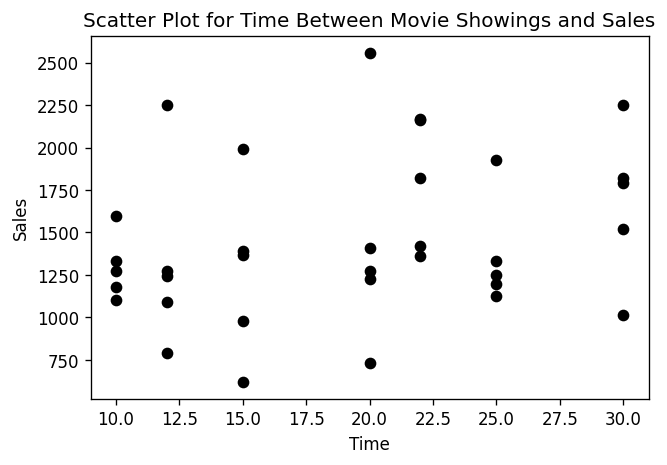

In [34]:
df_xr0367 = pd.read_excel('Xr03-67.xlsx')

plt.scatter(df_xr0367['Time'], df_xr0367['Sales'], color = 'k') 
plt.title('Scatter Plot for Time Between Movie Showings and Sales') 
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

- Tree

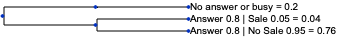

In [40]:
t = Tree("((No answer or busy = 0.2),(Answer 0.8 | Sale 0.05 = 0.04,Answer 0.8 | No Sale 0.95 = 0.76));" ) 
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_scale = False
t.render("%%inline", tree_style=ts) 

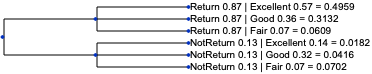

In [41]:
t = Tree("((Return 0.87 | Excellent 0.57 = 0.4959, Return 0.87 | Good 0.36 = 0.3132, Return 0.87 | Fair 0.07 = 0.0609), \
        (NotReturn 0.13 | Excellent 0.14 = 0.0182, NotReturn 0.13 | Good 0.32 = 0.0416, NotReturn 0.13 | Fair 0.07 = 0.0702));")
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_scale = False
t.render("%%inline", tree_style=ts) # use .render to draw on the screen instead of show up

# Ch1 & Ch2

## Noun explanation

1. Nomial data: 不可排序
2. Ordinal data: 可排序
3. Interval data: 


property  Difference, Order, Similar intervals <br>
categorical   nominal,ordinal   +/+         -/+   -/- <br>
Quantitative  interval          +           +     +

Ordinal or Nominal can count the frequency of each value of a variable, and compute the relative frequency (propotion)

## Class: an arrangement or table that groups data into non-overlapping interval
Steps of constructing the frequency distribution
1. Determine the num of classes
    Note that m $\leq$ class < m + class width
2. Compute class width
3. Determine the upper and lower bounds of each class
4. Count the frequencies for each class

## Histogram
1. It is possible to form an open ended class at the higher end or lower end of the histogram i.e. 旁邊可以畫寬一點
2. Class Relative Frequency = Class Frequency / Total number
3. Ogive: the cumulative relative frequency distribution
4. Skewness: positively (right) shewed 是右尾, negative (left) 是左尾
5. Unimodal: 單峰, Multimodal: 多峰
    The modal class means the class with the highest value

## Bell Shape
A special type of symmetric unimodal histogram.

# Ch3
1. Atithmetic Mean 算數平均數
   - most popular for interval data
   - seriously affected by extreme value
   - sample mean: $\overline X = \frac{\sum x_i}{n}$, populaton mean: $\mu = \frac{\sum x_1}{N}$
2. Median 中位數
    - 26, 26, 28, 29, 30, 31, 32, 60's median is 29.5
3. Mode 眾數
    - 可以寫都是眾數或是沒有
4. Geometric Mean 幾何平均數
    - measure of the average growth rate or rate of change
    - $R = ((1+R_1)(1+R_2) \cdots (1+R_n)) ^ {\frac{1}{n}} - 1$

In [2]:
### We can directly use the function in np to calculate the mean and median value instead of counting by ourself.
def mean(data):
    total = 0
    for i in range(np.size(data)):
        total += data[i]
    return total / np.size(data)

def median(data):
    data.sort()
    half = int(np.size(data)/2)
    return (data[half] + data[half - 1]) / 2

def geomean(rate):
    rate_1 = rate + 1
    geo_m = math.exp(np.log(rate_1).mean()) - 1
    return geo_m

5. Range
    - major shortcoming is its faiture to provide information on the dispersion
6. Variance for sample
    - 單位要平方
7. Std

In [3]:
print("Standard Deviation for Punter 3 = ", np.std(punter3, ddof = 1), "m") # default ddof = 0 (N-0), set ddof = 1 to adjust degree of freedom

print("Variance for Punter 3 = ", np.std(punter3, ddof = 1)**2, "m")

NameError: name 'punter3' is not defined

8. Empirical Rule
    - If a sample of measurements has a bell-shaped distribution, interval can be x +- S
9. Chebyshev theorem
    - $1 - \frac{1}{k^2}$
10. Coefficient
    - $CV = \frac{S}{\mu}$

# Ch4
1. p-th Percentile
    - At most p% of the measurements are less than that value
    - The location of percentile: $L_p = (n+1) \frac{p}{100}$

In [4]:
def percentrank(data, v):
    if type(data) == np.ndarray:
        alldata = data.copy()
        data = data.copy
    else:
        alldata = data.values.copy()
        data = data.values.copy()
    alldata.sort()
    L = np.searchsorted(alldata, v, side = 'left') + 1
    n = alldata.size
    percentrank_p = L*100/(n+1)
    return percentrank_p

r1 = np.array([0,0,5,7,8,9,12,14,22,33])
value = 12
r = percentrank(r1, value)
print(r)

63.63636363636363


2. IQR Inter-Quartile range = Q3- Q1 四分衛距

In [ ]:
def outluer(data):
    Q1 = percentile(data, 25)
    Q2 = percentile(data, 50)
    Q3 = percentile(data, 75)
    IQR = Q3 - Q1

3. measure of movement
    - m1 = $\sum \frac{x}{n}$, m2 = $\sum \frac{(x-xbar)^2}{n}$
4. coefficient of skewness
    - $g_1 = \frac{m_3}{\sqrt{(m_2)^3}}$
    - g1 > 0: skewed to right; g1 = 0: symmetric; g1 < 0; skewed to left
5. kurtosis
    - $K = \frac{m_4}{\sqrt{(m_2)^4}}$
    - K > 3: Leptokurtic; K = 3; Mesokurtic; K < 3; Platykurtic

In [ ]:
from scipy.stats import moment
m2 = moment(df_c4_4, moment=2)
m3 = moment(df_c4_4, moment=3)
m4 = moment(df_c4_4, moment=4)
skew_f = m3 / pow(pow(m2, 0.5), 3)
print("skewness = ", skew_f)
kurtosis_f = m4 / pow(m2, 2)
print("kurtosis = ", kurtosis_f)

covariance = $COV(X,Y) = \frac{\sum(x_i - \mu _x)(y_i - \mu _y}{n - 1}$
if the two variables are unrelated, cov will be closed to 0.

correlation: $r = \frac{S_{xy}}{S_x S_y}$

|r| < 0.25: very weak
0.25 <= r < 0.5: moderately weak
~0.75: moderately strong
0.75 <= r <= 1: very strong 

In [ ]:
cov_mat = np.cov(data[['column1','column2']].values, rowvar = False)
cor_mat = np.corrcoef(data[['c1', 'c2']].values, rowvar = False)

# CH6
For random variables,

$\mu = E(X) = \sum x_i p(x_i)$

variance = $\sum (x- \mu)^2 p(x) = \sum x^2p(x) - \mu ^2$ 

## Law of variance
$Var(c) = 0
Var(cX) = c^2 Var(X)
Var(X+c) = Var(X)$

## Joint prob distribution
covariance = $\sum (x-\mu _x)(y - \mu _y)p(x,y) = \sum xyp(x,y) - \mu _x \mu _y$
$E(X+Y) = E(X)+E(Y), Var(X+Y) = Var(X) + Var(Y) + 2COV(X,Y)$. IF X and T are independent, COV = 0

## Bernoulli

In [9]:
p = 0.3
n = 25
def Bernoulli(n, p, x):
    return math.comb(n, x)*pow(p, x)*pow((1 - p), n - x)

sum = 0
for i in range(0,11):
    sum += Bernoulli(n, p, i)

print("P(10 or fewer customers chose the leading brand) = ", sum)

P(10 or fewer customers chose the leading brand) =  0.9021999888782667


In [10]:
def Poison(mu, x):
    factorial = 1
    for i in range(1, x+1):
        factorial *= i;
    return math.exp(-mu) * pow(mu, x) / factorial

sum = 0
for i in range(0, 10):
    sum += Poison(5, i)
print("P(the site gets 10 or more hits in a week) = ", 1 - sum)

P(the site gets 10 or more hits in a week) =  0.03182805730620475


In [14]:
p = 0.25
geo = stats.geom(p)
x = 5
print(geo.pmf(x))
print(geo.cdf(x))
x = np.arange(25)
print(x)

0.0791015625
0.7626953124999999
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
